## Matplotlib常用技巧

### 导入

In [33]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

### 设置绘图样式

In [19]:
# 选择经典样式
plt.style.use('classic')

### 用不用`show()`显示图片

取决于开发环境  
1. 在脚本中画图必须用`plt.show()`。执行时会打开一个窗口
2. 在IPython shell画图  
3. 在IPython Notebook中画图
    + 使用`%matplotlib notebook` 会在Notebook中启动交互图形
    + 使用`%matplotlib inline` 会在Notebook中启动静态图形


<IPython.core.display.Javascript object>


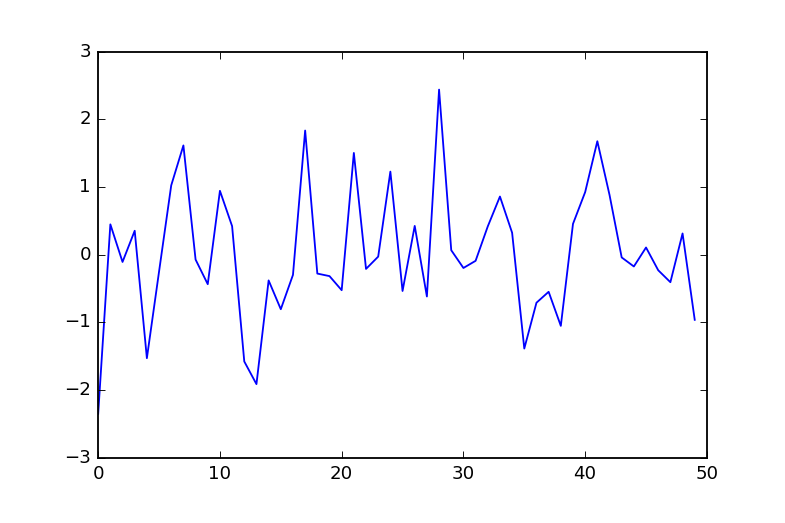

In [24]:
%matplotlib notebook
data = np.random.randn(50)
plt.plot(data)
plt.show()

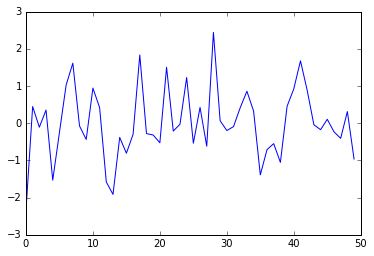

In [25]:
%matplotlib inline
plt.plot(data)

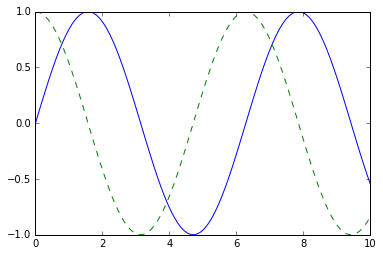

In [26]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

### 将图形保存为文件

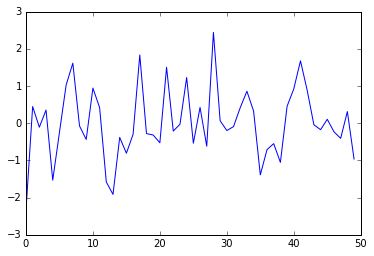

In [29]:
plt.plot(data)
plt.savefig('images/06.00_test1.png')


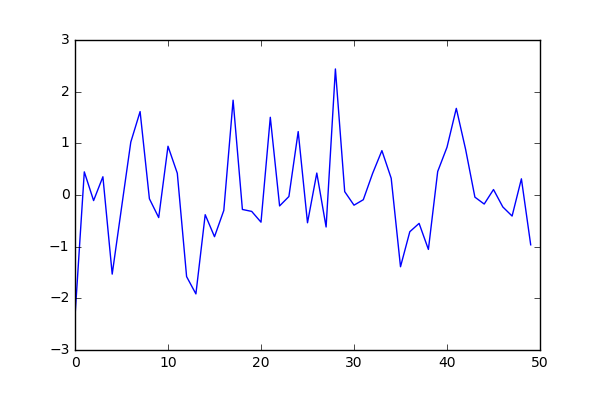

In [30]:
from IPython.display import Image
Image('images/06.00_test1.png')

在`savafig()`里面，保存图片文件的格式就是文件的扩展名。  
Matplotlib 支持许多图形格式， 具体格式由操作系统已安装的图形显示
接口决定。 你可以通过 canvas 对象的方法查看系统支持的文件格式：

In [32]:
fig = plt.figure()
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

<Figure size 432x288 with 0 Axes>

### 设置图形大小

`fig = plt.figure(figsize=(a,b), dpi=dpi)`
+ figsize：设置图形大小，a为图形的宽，b为图形的高，单位英寸
+ dpi: 设置图形每英寸的像素

此时图形的像素为：  
x，y = a\*dpi, b\*dpi    
分辨率为：  


也就是说同一像素尺寸的图形(如，1200\*600)可以有**任意种不同的组合**
figsize = (15,7.5), dpi=80  
figsize = (12,6), dpi=100  
figsize = (8,4), dpi=200  
...

线条，标记，文本等大多数元素都有以磅为单位的大小。Matplotlib 中 每英寸点数（ppi）为72，则宽度为 1 点的线将为 1/72 英寸宽，使用 fontsize 12 点的文本将是 12/72 寸高。

另一方面，更改dpi会缩放元素。在72 dpi时，1 宽度的线是 1 像素。在144 dpi时，这条线就是 2 像素。因此，更大的dpi就像放大镜一样。**所有元素都通过镜头的放大倍数进行缩放**。dpi越高，图片清晰度越好

`plt.savefig(dpi=100)`

In [36]:
data = np.random.randint(1,10,5)

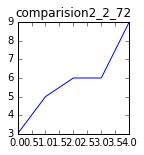

In [82]:
fig1 = plt.figure(figsize=(2,2), dpi=72)
plt.plot(data)
plt.title('comparision2_2_72')
plt.savefig('images/comparision2_2_72',dpi=72)
plt.show()

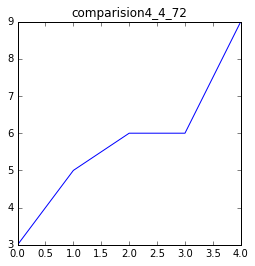

In [83]:
fig2 = plt.figure(figsize=(4,4), dpi=72)
plt.plot(data)
plt.title('comparision4_4_72')
plt.savefig('images/comparision4_4_72',dpi=72)
plt.show()

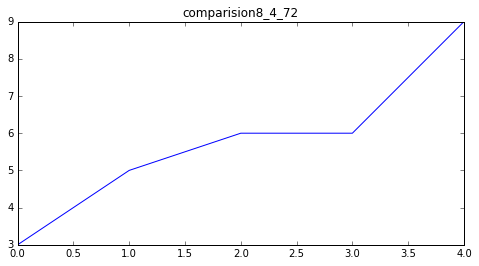

In [84]:
fig = plt.figure(figsize=(8,4), dpi=72)
plt.plot(data)
plt.title('comparision8_4_72')
plt.savefig('images/comparision8_4_72',dpi=72)
plt.show()

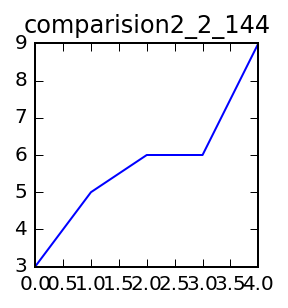

In [85]:
fig = plt.figure(figsize=(2,2), dpi=144)
plt.plot(data)
plt.title('comparision2_2_144')
plt.savefig('images/comparision2_2_144',dpi=144)
plt.show()

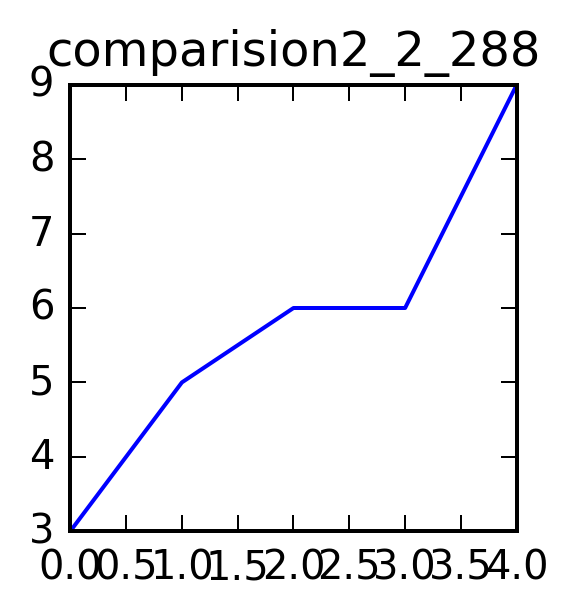

In [86]:
fig = plt.figure(figsize=(2,2), dpi=288)
plt.plot(data)
plt.title('comparision2_2_288')
plt.savefig('images/comparision2_2_288', dpi=288)
plt.show()

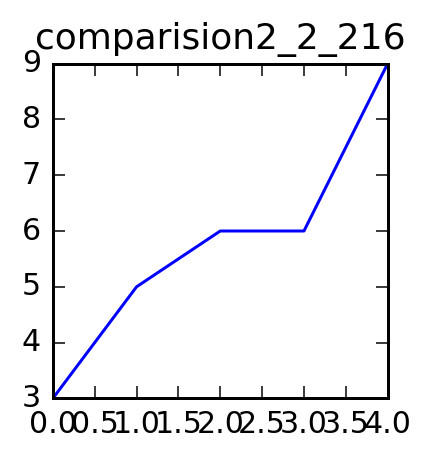

In [87]:
fig = plt.figure(figsize=(2,2), dpi=216)
plt.plot(data)
plt.title('comparision2_2_216')
plt.savefig('images/comparision2_2_216', dpi=216)
plt.show()

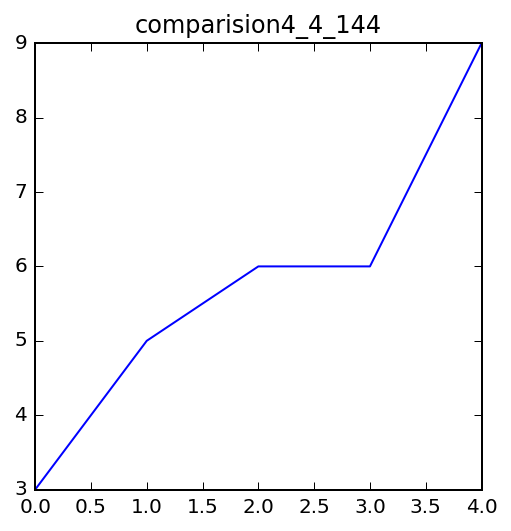

In [88]:
fig = plt.figure(figsize=(4,4), dpi=144)
plt.plot(data)
plt.title('comparision4_4_144')
plt.savefig('images/comparision4_4_144', dpi=144)
plt.show()

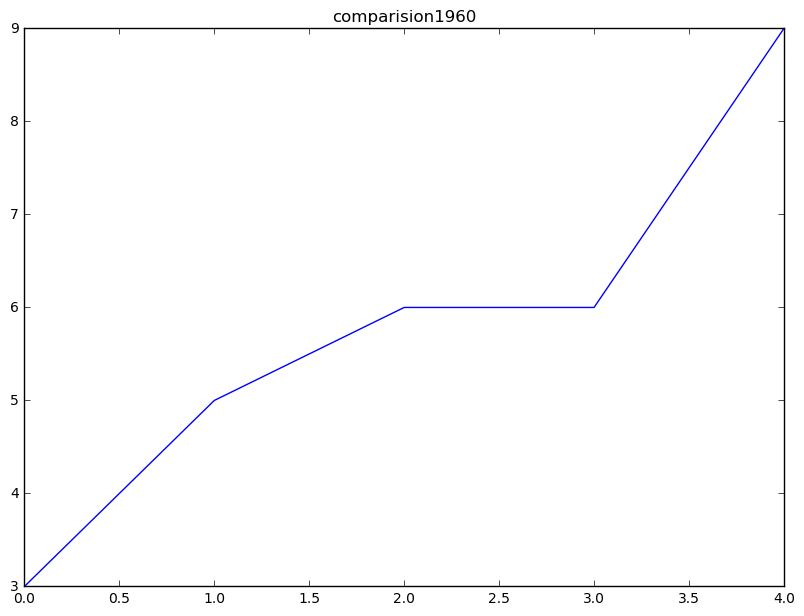

In [93]:
fig = plt.figure(figsize=(19.6/2,14.4/2), dpi=100)
plt.plot(data)
plt.title('comparision1960')
plt.savefig('images/comparision1960', dpi=200)
plt.show()